<a href="https://colab.research.google.com/github/matthew-ngzc/AI-Safety-Module/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clone the repository

In [1]:
try:
    ! git clone https://github.com/NayMyatMin/CS427_SMU
    HOME_DIR = "./CS427_SMU/week2/"
except:
    print('Already clone!!!')

fatal: destination path 'CS427_SMU' already exists and is not an empty directory.


Exercise 2a: This following is an implementation of the FGSM attach that is untargeted.

Initiating FGSM untargeted Attack for eps = 0.01.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

eps = 0.01: 0/20 successful, avg time = 0.002s
Initiating FGSM untargeted Attack for eps = 0.02.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsucces

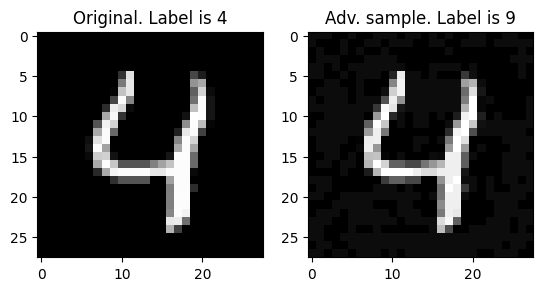

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack successful: Found an adversarial sample!



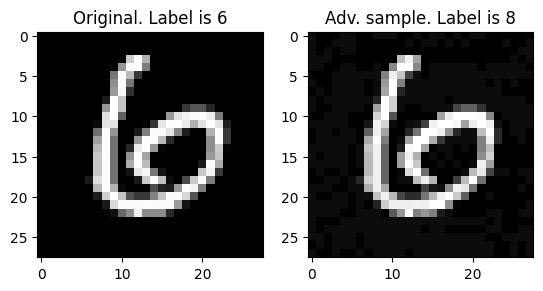

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack successful: Found an adversarial sample!



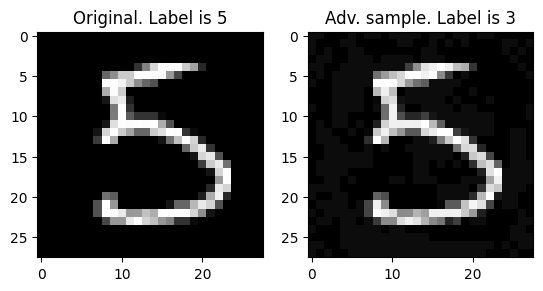

Attack unsuccessful.

Attack unsuccessful.

Attack unsuccessful.

Attack successful: Found an adversarial sample!



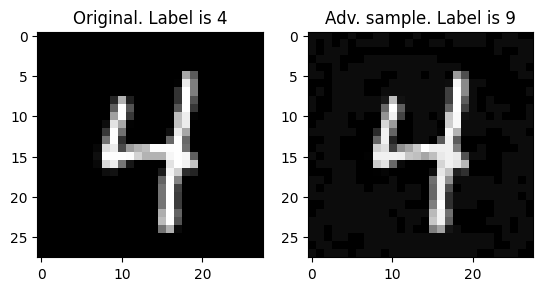

Attack unsuccessful.

eps = 0.05: 4/20 successful, avg time = 0.057s
Initiating FGSM untargeted Attack for eps = 0.1.

Attack successful: Found an adversarial sample!



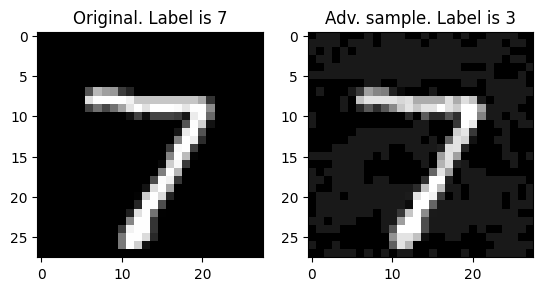

Attack successful: Found an adversarial sample!



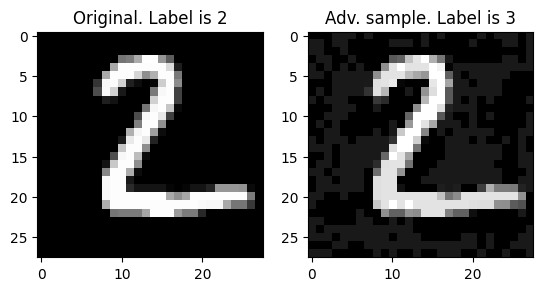

Attack successful: Found an adversarial sample!



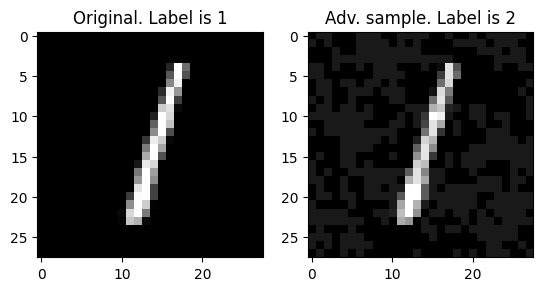

Attack unsuccessful.

Attack successful: Found an adversarial sample!



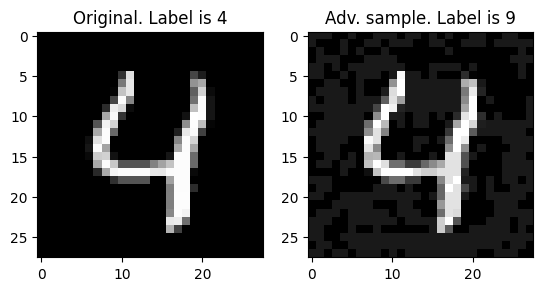

Attack successful: Found an adversarial sample!



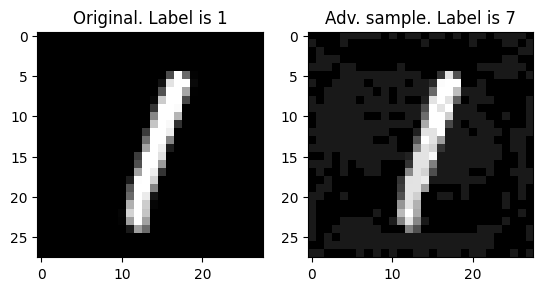

Attack successful: Found an adversarial sample!



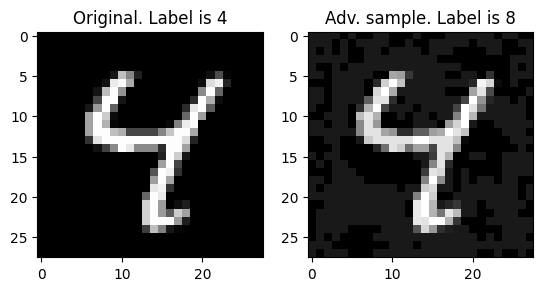

Attack successful: Found an adversarial sample!



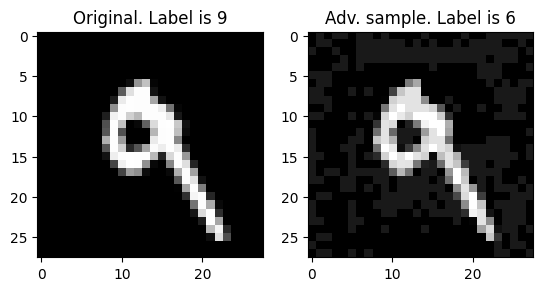

Attack successful: Found an adversarial sample!



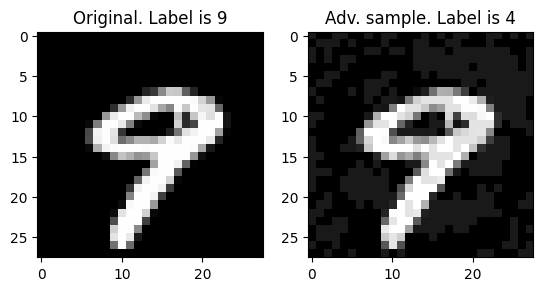

Attack unsuccessful.

Attack successful: Found an adversarial sample!



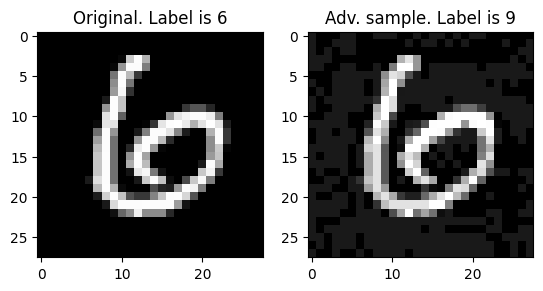

Attack successful: Found an adversarial sample!



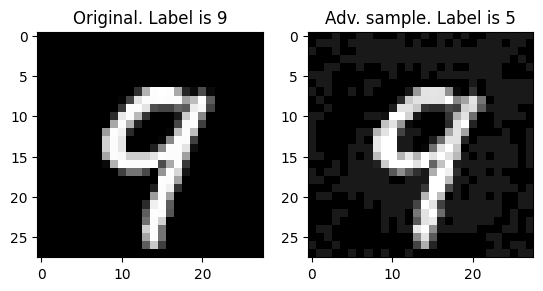

Attack unsuccessful.

Attack successful: Found an adversarial sample!



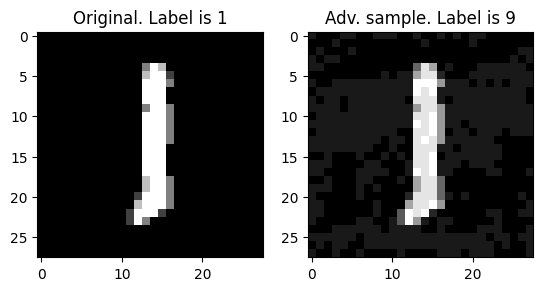

Attack successful: Found an adversarial sample!



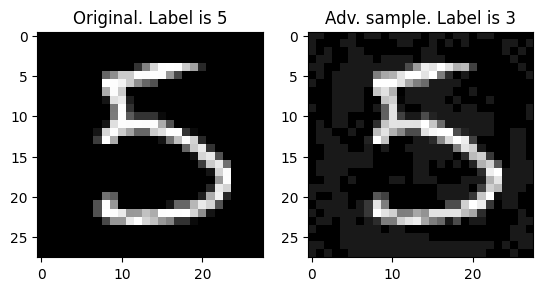

Attack successful: Found an adversarial sample!



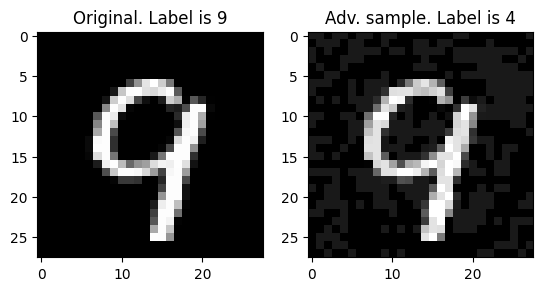

Attack successful: Found an adversarial sample!



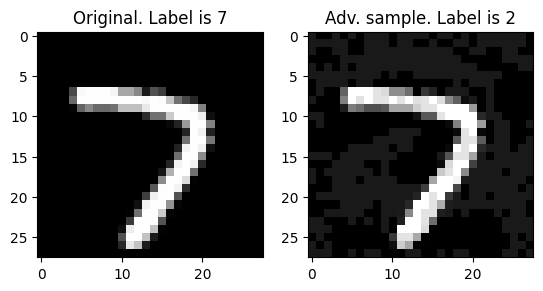

Attack successful: Found an adversarial sample!



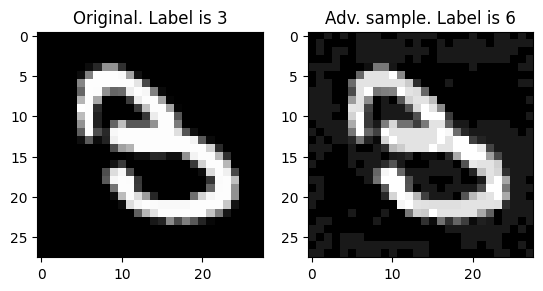

Attack successful: Found an adversarial sample!



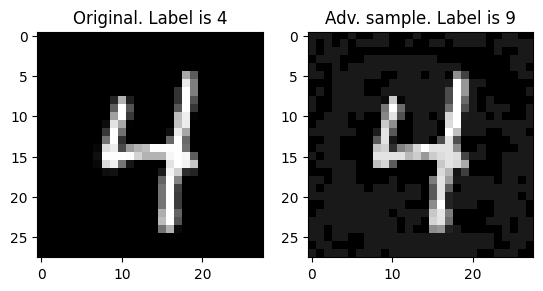

Attack successful: Found an adversarial sample!



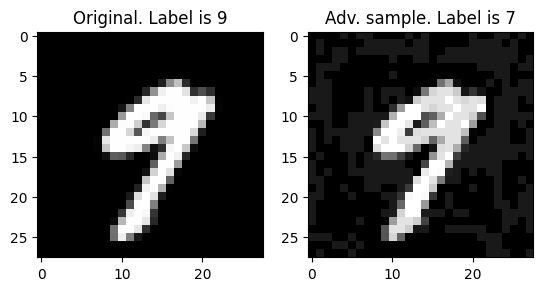

eps = 0.1: 17/20 successful, avg time = 0.166s
Initiating FGSM untargeted Attack for eps = 0.2.

Attack successful: Found an adversarial sample!



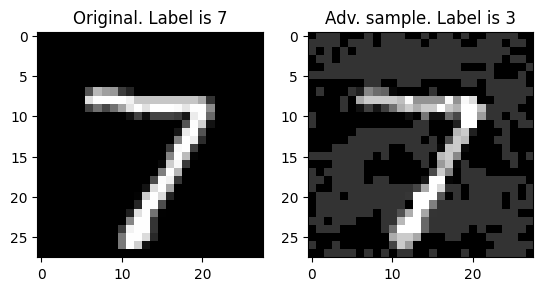

Attack successful: Found an adversarial sample!



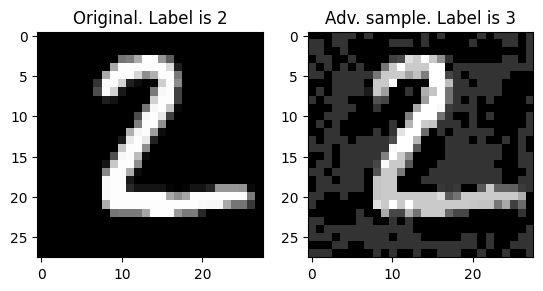

Attack successful: Found an adversarial sample!



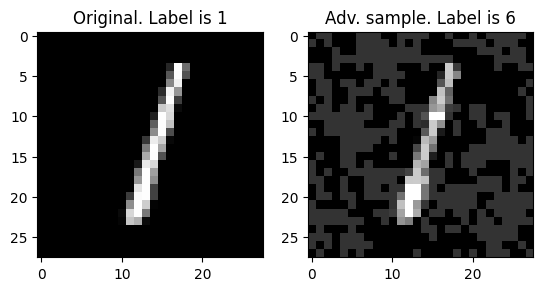

Attack successful: Found an adversarial sample!



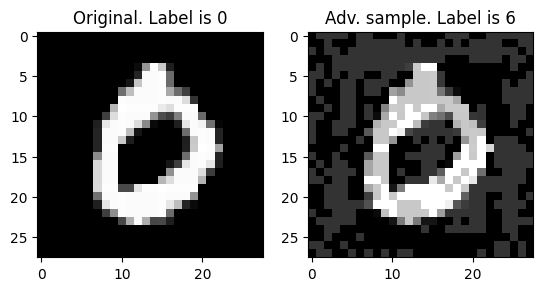

Attack successful: Found an adversarial sample!



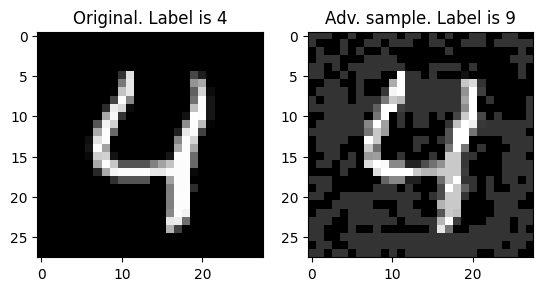

Attack successful: Found an adversarial sample!



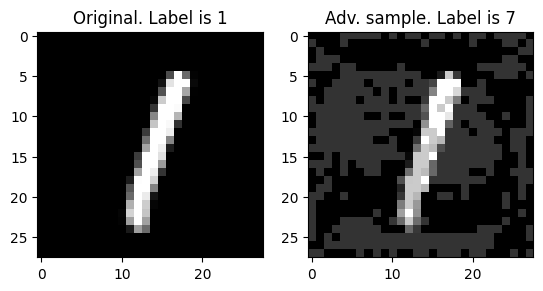

Attack successful: Found an adversarial sample!



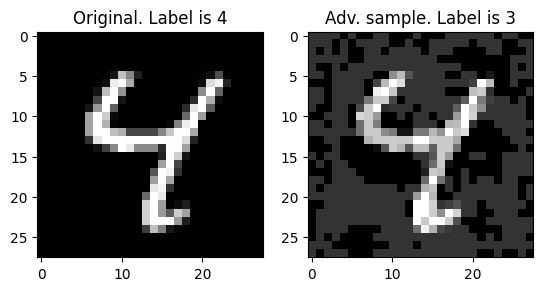

Attack successful: Found an adversarial sample!



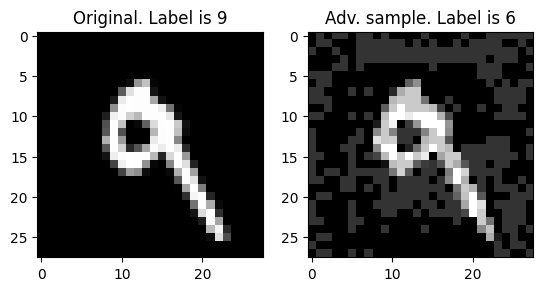

Attack successful: Found an adversarial sample!



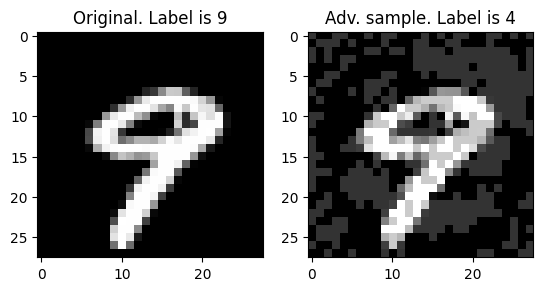

Attack successful: Found an adversarial sample!



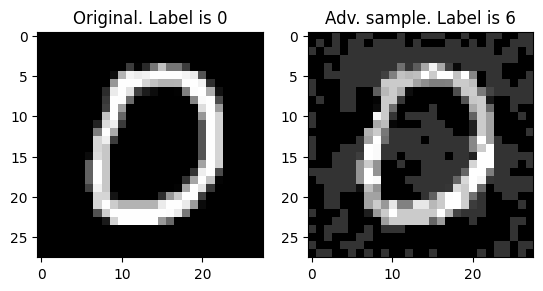

Attack successful: Found an adversarial sample!



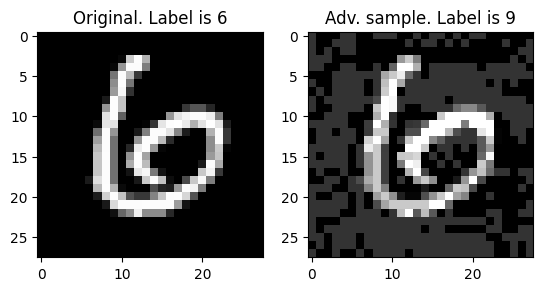

Attack successful: Found an adversarial sample!



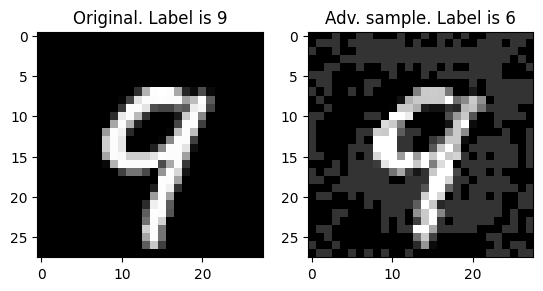

Attack successful: Found an adversarial sample!



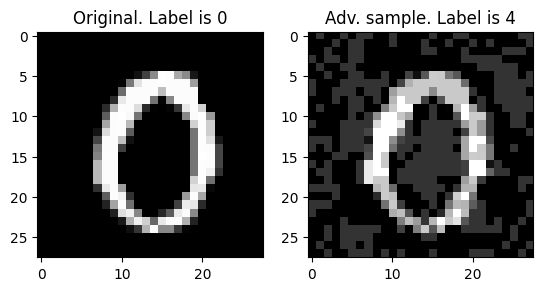

Attack successful: Found an adversarial sample!



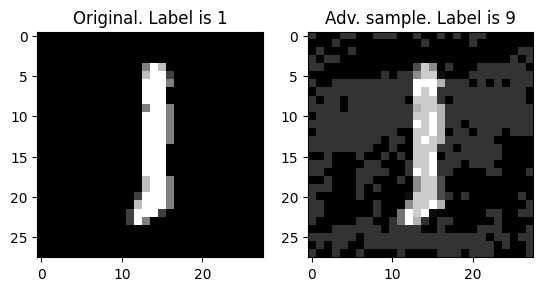

Attack successful: Found an adversarial sample!



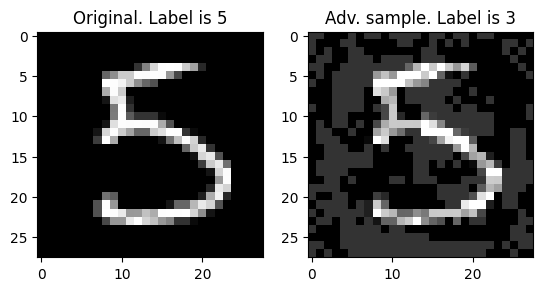

Attack successful: Found an adversarial sample!



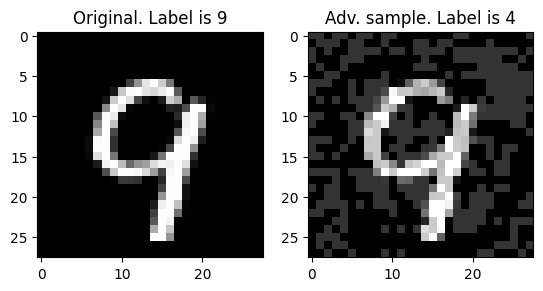

Attack successful: Found an adversarial sample!



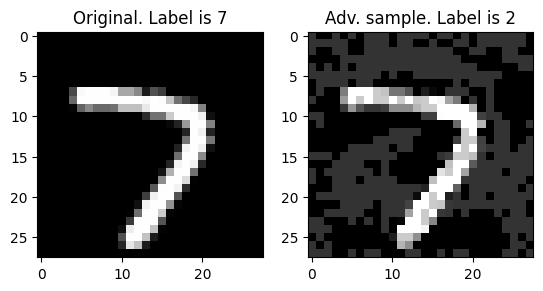

Attack successful: Found an adversarial sample!



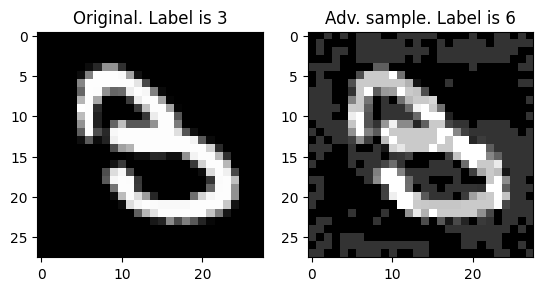

Attack successful: Found an adversarial sample!



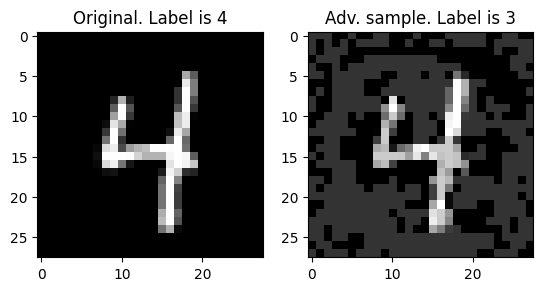

Attack successful: Found an adversarial sample!



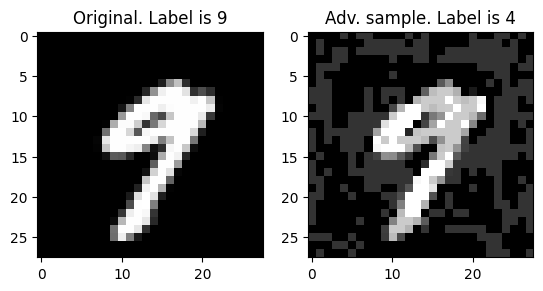

eps = 0.2: 20/20 successful, avg time = 0.256s


In [2]:
# This is an implementation of FGSM, an untargeted attack


import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np
import ast
import time
import pandas as pd


class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def load_model(model_class, name):
    model = model_class()
    model.load_state_dict(torch.load(name))

    return model


def denormalize(x):
    x = (x * 255).astype('uint8')
    x = x.reshape(28,28)

    return x


def display(x, y, x_adv, y_adv):
    x = denormalize(x)
    x_adv = denormalize(x_adv)

    fig, ax = plt.subplots(1, 2)

    ax[0].set(title='Original. Label is {}'.format(y))
    ax[1].set(title='Adv. sample. Label is {}'.format(y_adv))

    ax[0].imshow(x, cmap='gray')
    ax[1].imshow(x_adv, cmap='gray')

    plt.show()


def fgsm(model, x, y, eps): #x is the sample, y is its original label; eps is the attacking budget
    x_adv = x.detach().clone()
    x_adv.requires_grad = True

    pred = model(x_adv)
    loss = F.cross_entropy(pred, y)

    loss.backward()

    grad_data = x_adv.grad.data
    #The following line of code is the essence of FGSM.
    #That is, we update x_adv (initially an exact copy of x) by updating its pixel values according to the gradient.
    #Note that grad_data is the gradient obtained based on the loss above.
    #The following line thus effectively increases the loss of the original label.
    x_adv = torch.clamp(x_adv + eps * grad_data.sign(), 0, 1).detach()

    pred_adv = model(x_adv) #get the prediction of x'
    y_adv = pred_adv.argmax(1) #get the label of x'

    if y_adv != y:
        x = x.detach().numpy().reshape(-1)
        x_adv = x_adv.detach().numpy().reshape(-1)

        y, y_adv = y.item(), y_adv.item()

        print('Attack successful: Found an adversarial sample!\n')

        #print('pred adv = {}'.format(pred_adv.detach().numpy().reshape(-1)))
        #print('lbl adv = {}\n'.format(y_adv))

        display(x, y, x_adv, y_adv)
        return True
    else:
        print('Attack unsuccessful.\n')
        return False


model = load_model(MNISTNet, HOME_DIR + 'exercise2/mnist.pt')

labels = np.array(ast.literal_eval(open(HOME_DIR + 'exercise2/toattack/labels.txt', 'r').readline()))

num_attack = 20
# diff eps to try
eps_list = [0.01, 0.02, 0.05, 0.1, 0.2]
attacks = ["FGSM", "PGD", "C&W"]

results = {
    eps: {
        attack: {
            "num_adv": 0,
            "avg_time": 0.0
        }
        for attack in attacks
    }
    for eps in eps_list
}

for eps in eps_list:
  print('Initiating FGSM untargeted Attack for eps = {}.\n'.format(eps ))

  num_adv = 0
  total_time = 0.0

  # perform 20 attacks
  for i in range(num_attack):

      file_name = HOME_DIR + 'exercise2/toattack/data' + str(i) + '.txt'
      x = np.array(ast.literal_eval(open(file_name, 'r').readline()))
      x = torch.Tensor(x)
      y = torch.Tensor([labels[i]]).type(torch.LongTensor)

      pred = model(x)
      #print('pred img = {}'.format(pred.detach().numpy().reshape(-1)))
      #print('lbl imp = {}\n'.format(y.item()))

      # time this attack
      start = time.time()
      if fgsm(model, x, y, eps): num_adv += 1
      end = time.time()
      total_time += (end - start)

  # get average time
  avg_time = total_time / num_attack

  print(f'eps = {eps}: {num_adv}/{num_attack} successful, avg time = {avg_time:.3f}s')

  results[eps]["FGSM"]["avg_time"] = avg_time
  results[eps]["FGSM"]["num_adv"] = num_adv


Exercise 2b: In this exercise, you are asked to modify the FGSM attack method so that it becomes a targeted attack.

Initiating FGSM targeted Attack on 20 images with target 3.

Attacking a new image.
Attack successful: Found an adversarial sample!



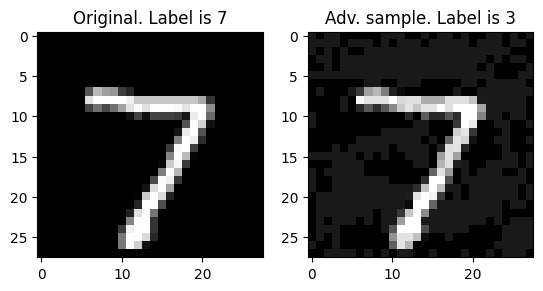

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack successful: Found an adversarial sample!



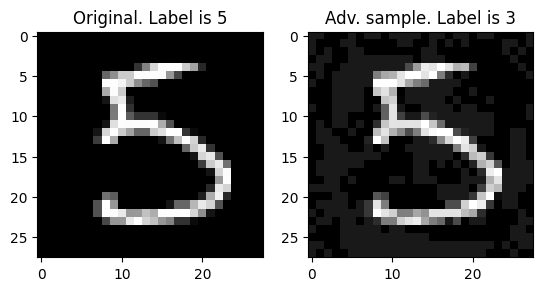

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
The sample is already classified as the target! Skip the sample.

Attacking a new image.
Attack unsuccessful.

Attacking a new image.
Attack successful: Found an adversarial sample!



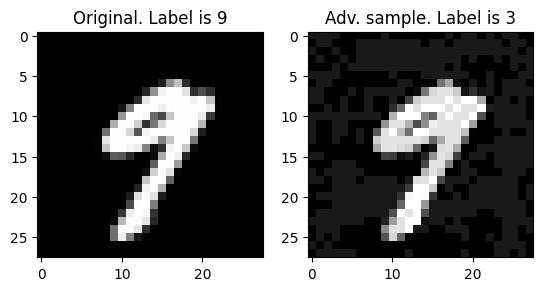

3 of the 20 attacks are successful.


In [3]:
# This is an implementation of FGSM, an untargeted attack


import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np
import ast


class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def load_model(model_class, name):
    model = model_class()
    model.load_state_dict(torch.load(name))

    return model


def denormalize(x):
    x = (x * 255).astype('uint8')
    x = x.reshape(28,28)

    return x


def display(x, y, x_adv, y_adv):
    x = denormalize(x)
    x_adv = denormalize(x_adv)

    fig, ax = plt.subplots(1, 2)

    ax[0].set(title='Original. Label is {}'.format(y))
    ax[1].set(title='Adv. sample. Label is {}'.format(y_adv))

    ax[0].imshow(x, cmap='gray')
    ax[1].imshow(x_adv, cmap='gray')

    plt.show()


def fgsm(model, x, y, eps, target): # pass the target label as parameter for the targeted attack
    # x is the image sample (Tensor), y is the original label (Tensor)
    target = torch.Tensor([target]).type(torch.LongTensor)
    if y == target:
        print('The sample is already classified as the target! Skip the sample.\n')
        return False

    x_adv = x.detach().clone()
    x_adv.requires_grad = True

    pred = model(x_adv)
    #this line has been modified for a targeted attack already
    loss = F.cross_entropy(pred, target)

    loss.backward()

    grad_data = x_adv.grad.data

    #TODO: add one line here to conduct a targeted attack according to your formulation of the optimization problem.
    #You can refer to the corresponding line in the untargeted attack for inspiration.
    #Note that grad_data is the gradient obtained based on the loss of the target.
    # originally is +, because originally the target was the og label, so uw to make the loss larger
    # now we have a target, we want to minimise the loss to the target
    # qn: where is the part where we are telling it to make it the target? Why are we not using the loss variable anywhere?
    x_adv = torch.clamp(x_adv - eps * grad_data.sign(), 0, 1).detach()


    #the following code checks whether the attack is successful.
    pred_adv = model(x_adv)
    y_adv = pred_adv.argmax(1)

    # if y_adv != y: # modify the condition to catch succesful targeted attacks
    if y_adv == target:
        x = x.detach().numpy().reshape(-1)
        x_adv = x_adv.detach().numpy().reshape(-1)

        y, y_adv = y.item(), y_adv.item()

        print('Attack successful: Found an adversarial sample!\n')

        #print('pred adv = {}'.format(pred_adv.detach().numpy().reshape(-1)))
        #print('lbl adv = {}\n'.format(y_adv))

        display(x, y, x_adv, y_adv)
        return True
    else:
        print('Attack unsuccessful.\n')
        return False


model = load_model(MNISTNet, HOME_DIR + 'exercise2/mnist.pt')
# changing eps determines how distorted the image becomes, increasing it makes the distortion more
num_adv, eps = 0, 0.1

labels = np.array(ast.literal_eval(open(HOME_DIR + 'exercise2/toattack/labels.txt', 'r').readline()))

num_attack = 20
target = 3
print('Initiating FGSM targeted Attack on {} images with target {}.\n'.format(num_attack, target))

for i in range(num_attack):
    print('Attacking a new image.')
    file_name = HOME_DIR + 'exercise2/toattack/data' + str(i) + '.txt'
    x = np.array(ast.literal_eval(open(file_name, 'r').readline()))
    x = torch.Tensor(x)
    y = torch.Tensor([labels[i]]).type(torch.LongTensor)

    pred = model(x)
    #print('pred img = {}'.format(pred.detach().numpy().reshape(-1)))
    #print('lbl imp = {}\n'.format(y.item()))

    if fgsm(model, x, y, eps, target): num_adv += 1

print('{} of the {} attacks are successful.'.format(num_adv, num_attack))


Exercise 3: In this exercise, you are to compare three different adversarial attacks: FGSM (See exercise 2a), PGD, and C&W to compare their effectiveness.

The following is an implementation of the (untargeted) PGD attack.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

eps = 0.01: 0/20 successful, avg time = 0.008s
Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack un

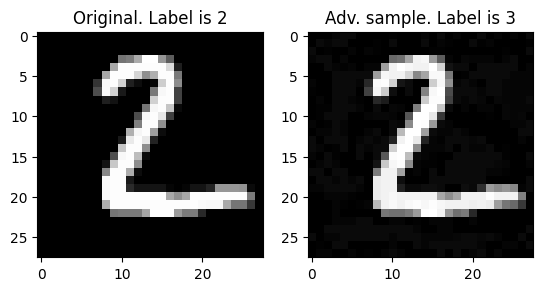

Attack a new image.
Attack successful: Found an adversarial sample!



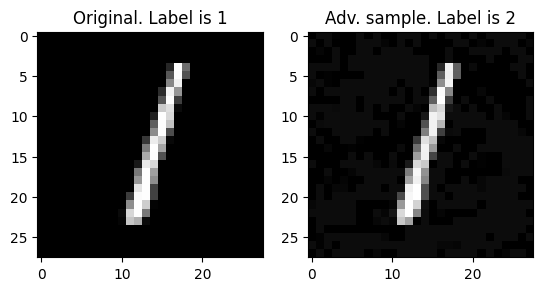

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample!



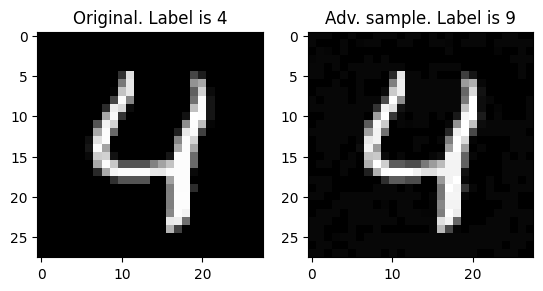

Attack a new image.
Attack successful: Found an adversarial sample!



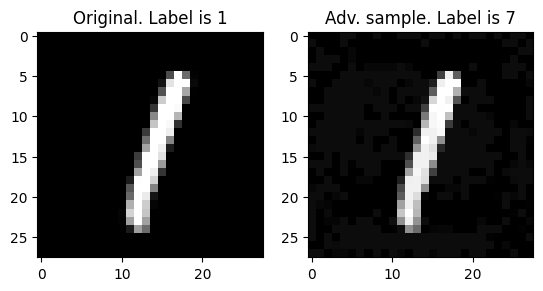

Attack a new image.
Attack successful: Found an adversarial sample!



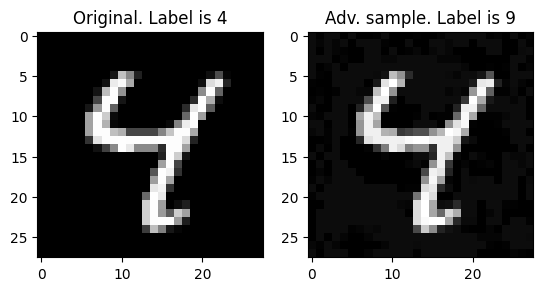

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample!



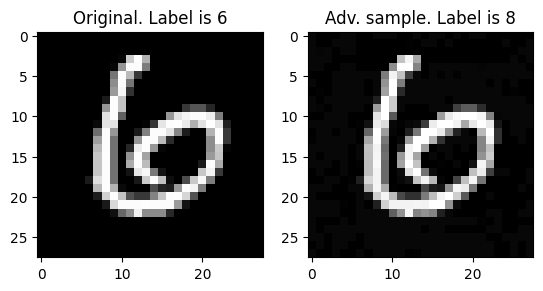

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample!



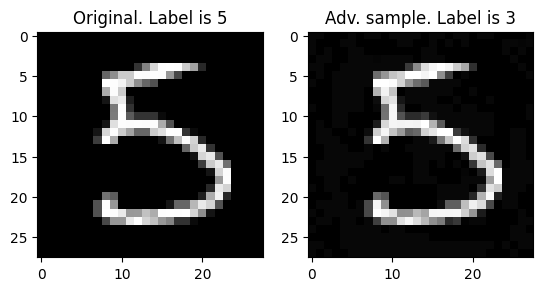

Attack a new image.
Attack successful: Found an adversarial sample!



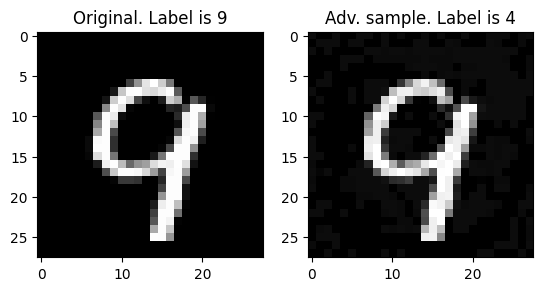

Attack a new image.
Attack successful: Found an adversarial sample!



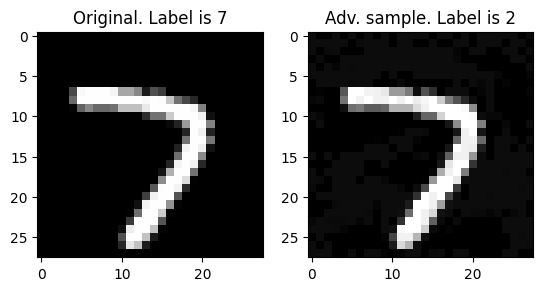

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample!



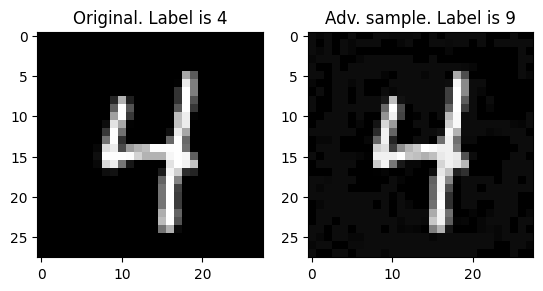

Attack a new image.
Attack successful: Found an adversarial sample!



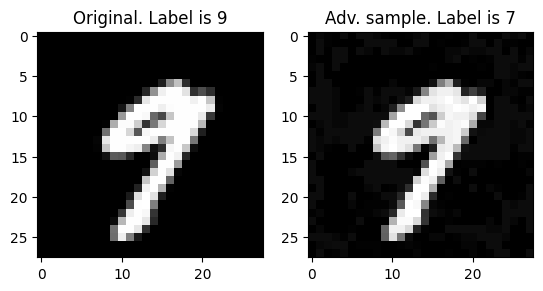

eps = 0.05: 11/20 successful, avg time = 0.140s
Attack a new image.
Attack successful: Found an adversarial sample!



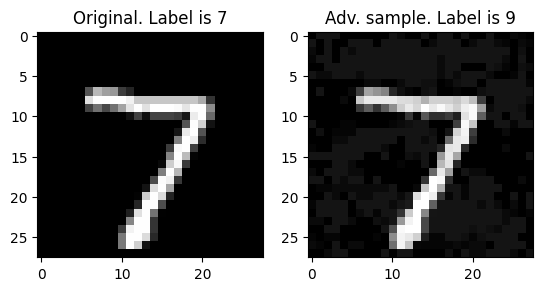

Attack a new image.
Attack successful: Found an adversarial sample!



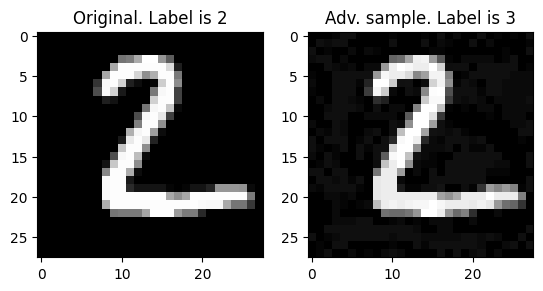

Attack a new image.
Attack successful: Found an adversarial sample!



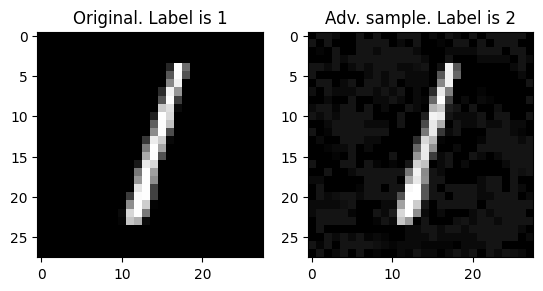

Attack a new image.
Attack successful: Found an adversarial sample!



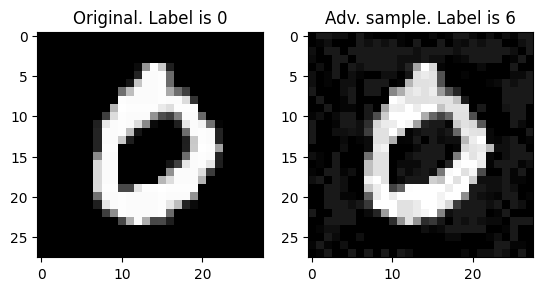

Attack a new image.
Attack successful: Found an adversarial sample!



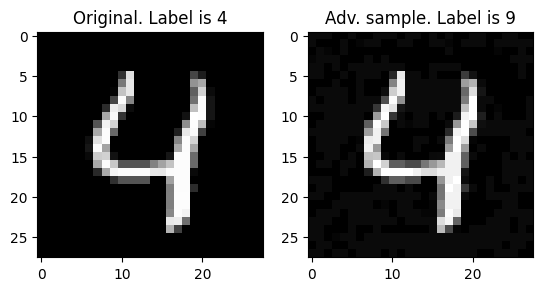

Attack a new image.
Attack successful: Found an adversarial sample!



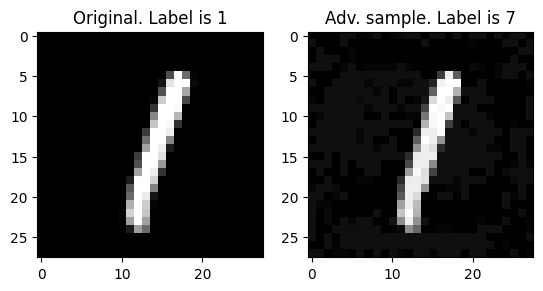

Attack a new image.
Attack successful: Found an adversarial sample!



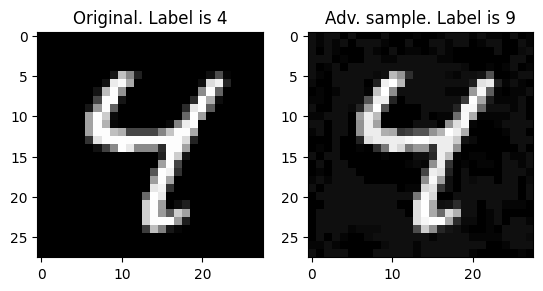

Attack a new image.
Attack successful: Found an adversarial sample!



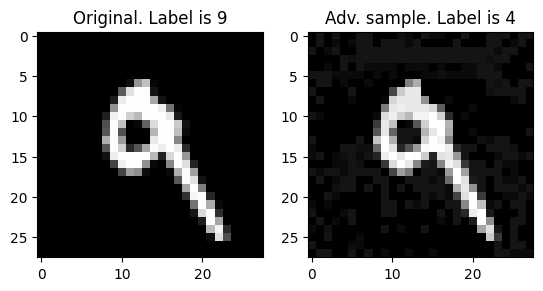

Attack a new image.
Attack successful: Found an adversarial sample!



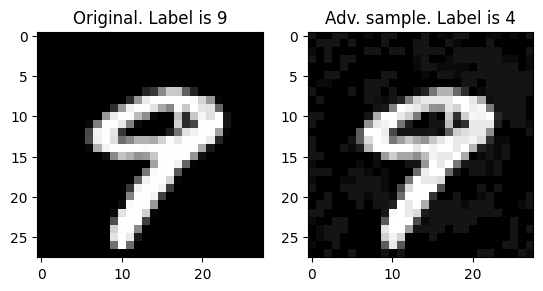

Attack a new image.
Attack successful: Found an adversarial sample!



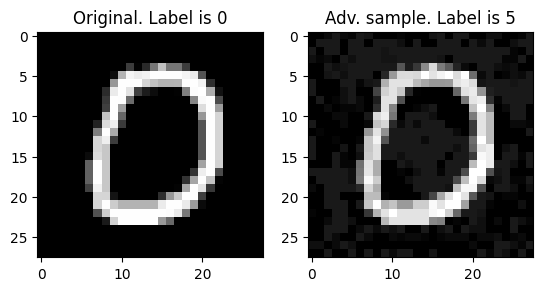

Attack a new image.
Attack successful: Found an adversarial sample!



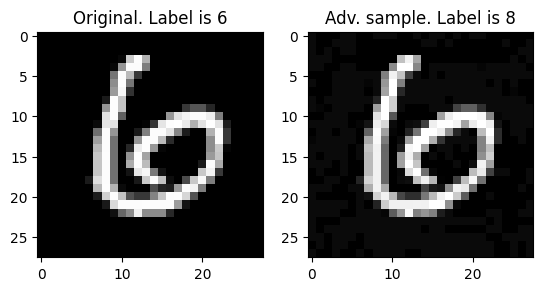

Attack a new image.
Attack successful: Found an adversarial sample!



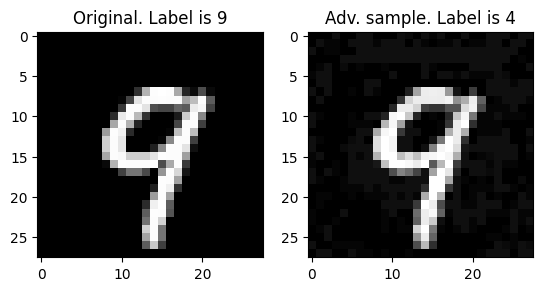

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample!



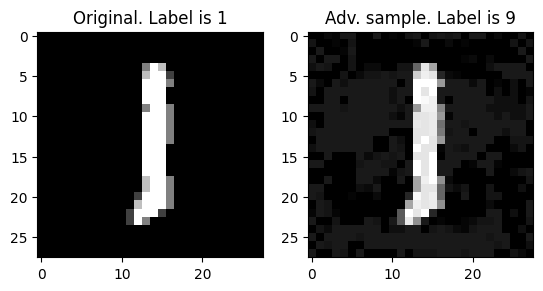

Attack a new image.
Attack successful: Found an adversarial sample!



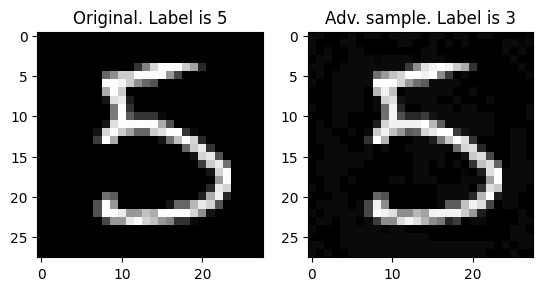

Attack a new image.
Attack successful: Found an adversarial sample!



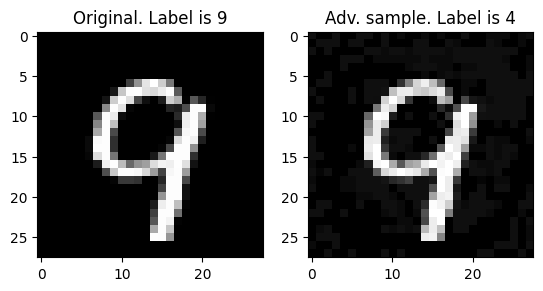

Attack a new image.
Attack successful: Found an adversarial sample!



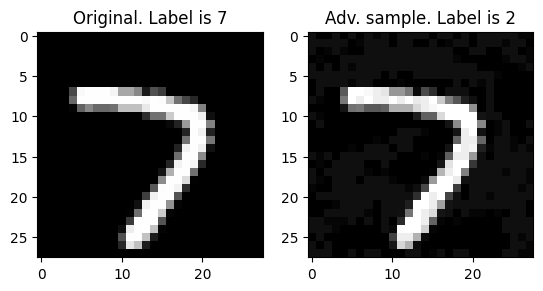

Attack a new image.
Attack successful: Found an adversarial sample!



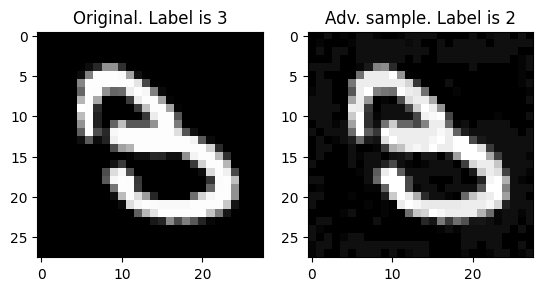

Attack a new image.
Attack successful: Found an adversarial sample!



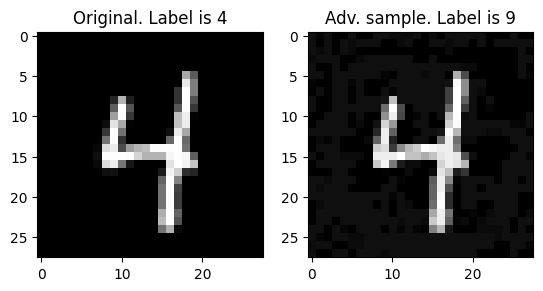

Attack a new image.
Attack successful: Found an adversarial sample!



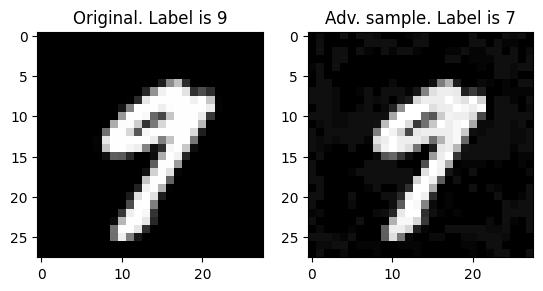

eps = 0.1: 19/20 successful, avg time = 0.190s
Attack a new image.
Attack successful: Found an adversarial sample!



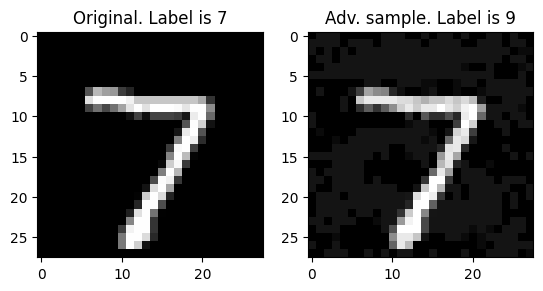

Attack a new image.
Attack successful: Found an adversarial sample!



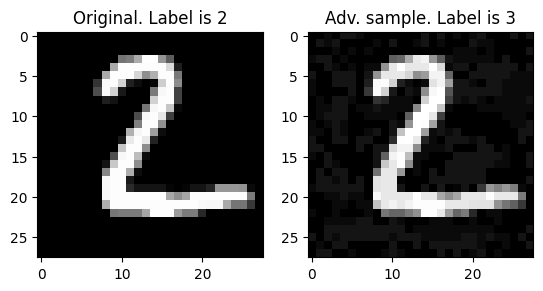

Attack a new image.
Attack successful: Found an adversarial sample!



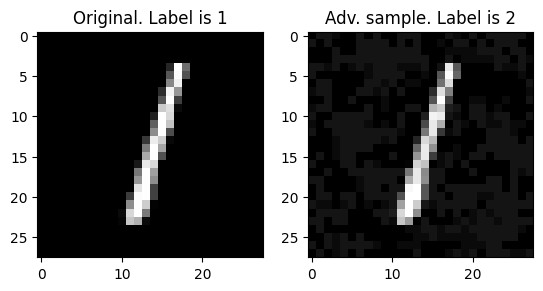

Attack a new image.
Attack successful: Found an adversarial sample!



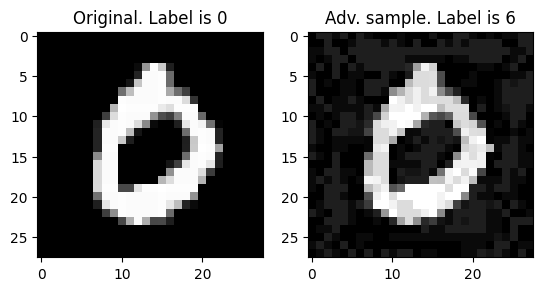

Attack a new image.
Attack successful: Found an adversarial sample!



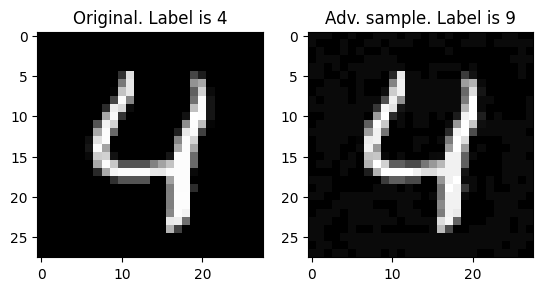

Attack a new image.
Attack successful: Found an adversarial sample!



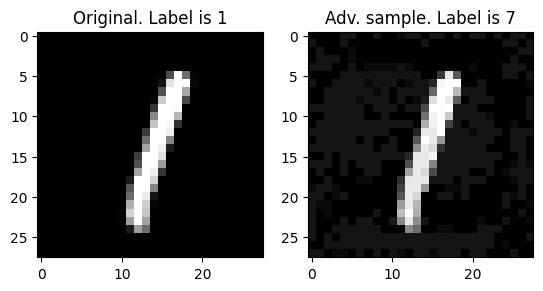

Attack a new image.
Attack successful: Found an adversarial sample!



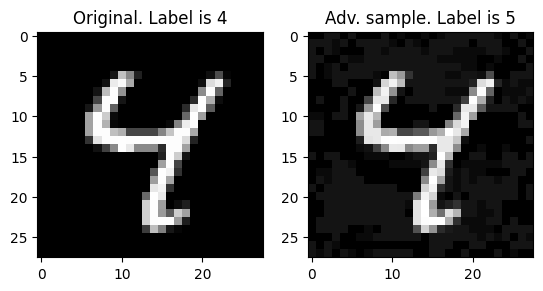

Attack a new image.
Attack successful: Found an adversarial sample!



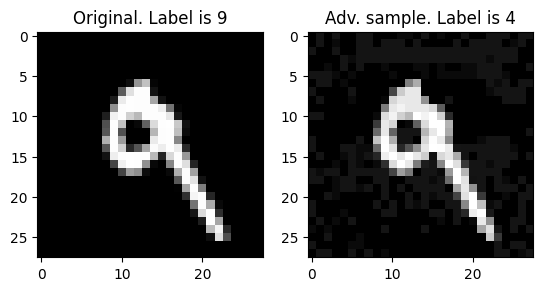

Attack a new image.
Attack successful: Found an adversarial sample!



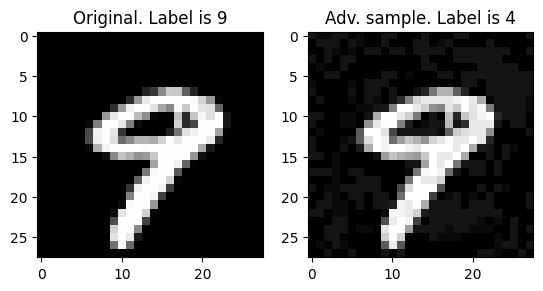

Attack a new image.
Attack successful: Found an adversarial sample!



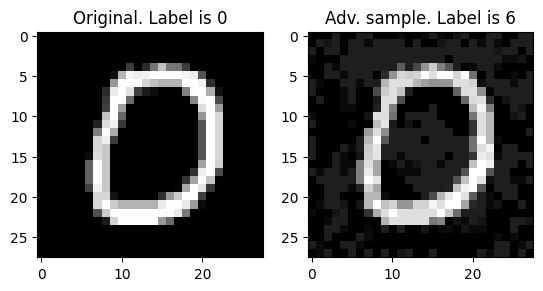

Attack a new image.
Attack successful: Found an adversarial sample!



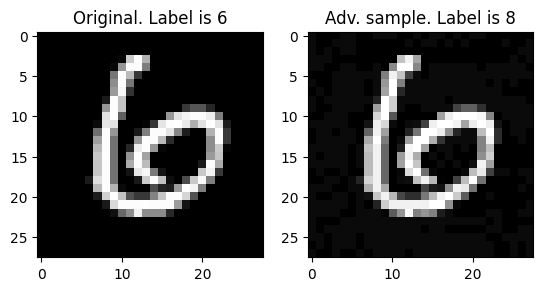

Attack a new image.
Attack successful: Found an adversarial sample!



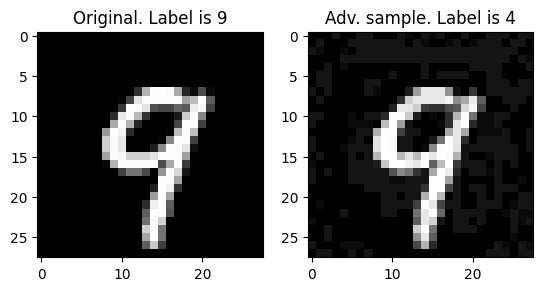

Attack a new image.
Attack successful: Found an adversarial sample!



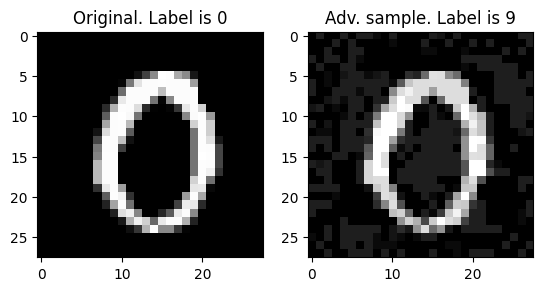

Attack a new image.
Attack successful: Found an adversarial sample!



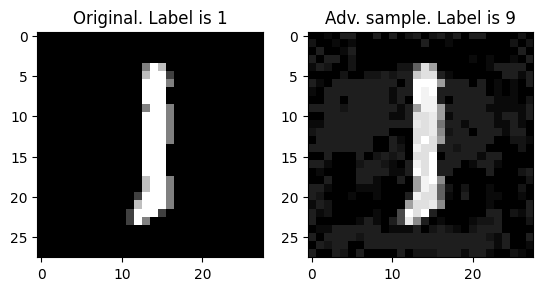

Attack a new image.
Attack successful: Found an adversarial sample!



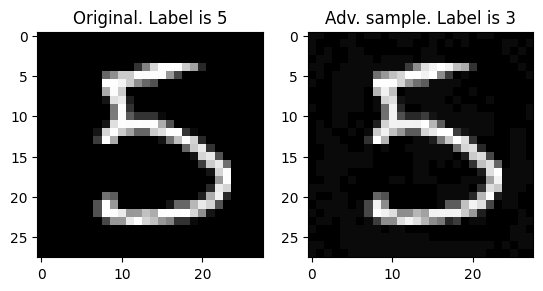

Attack a new image.
Attack successful: Found an adversarial sample!



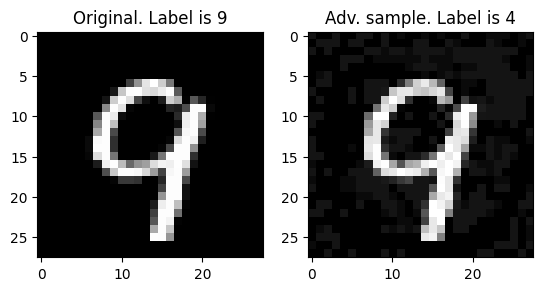

Attack a new image.
Attack successful: Found an adversarial sample!



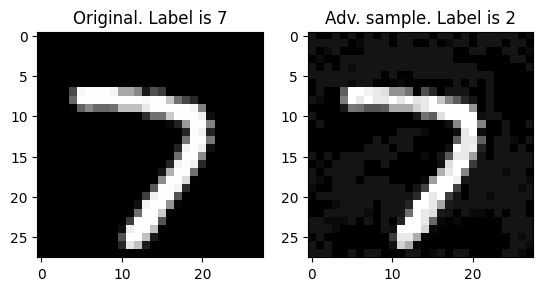

Attack a new image.
Attack successful: Found an adversarial sample!



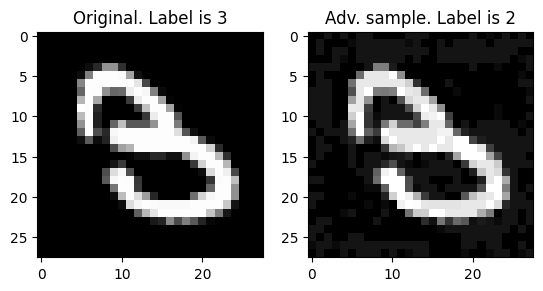

Attack a new image.
Attack successful: Found an adversarial sample!



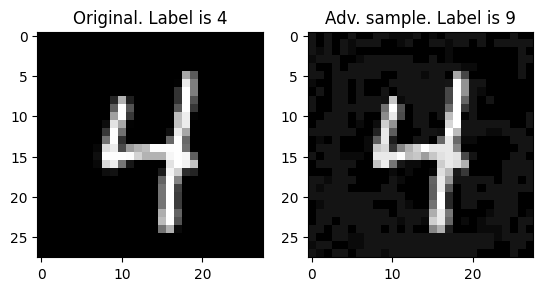

Attack a new image.
Attack successful: Found an adversarial sample!



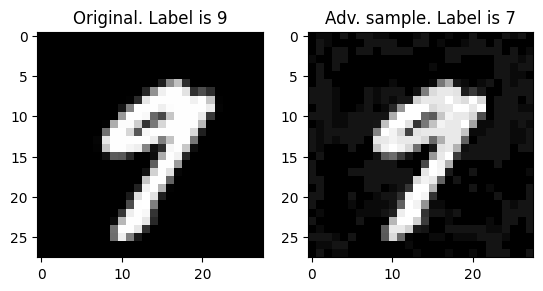

eps = 0.2: 20/20 successful, avg time = 0.243s


In [4]:
# This is an implementation of PGD, an untargeted attack

import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np
import ast


class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def load_model(model_class, name):
    model = model_class()
    model.load_state_dict(torch.load(name))

    return model


def denormalize(x):
    x = (x * 255).astype('uint8')
    x = x.reshape(28,28)

    return x


def display(x, y, x_adv, y_adv):
    x = denormalize(x)
    x_adv = denormalize(x_adv)

    fig, ax = plt.subplots(1, 2)

    ax[0].set(title='Original. Label is {}'.format(y))
    ax[1].set(title='Adv. sample. Label is {}'.format(y_adv))

    ax[0].imshow(x, cmap='gray')
    ax[1].imshow(x_adv, cmap='gray')

    plt.show()


def pgd(model, x, y, eps, max_iter): # pass the target label as parameter for the targeted attack
    # x is the image sample (Tensor), y is the original label (Tensor)

    x_adv = x.detach().clone()
    alpha = eps / max_iter * 2.0

    for _ in range(max_iter):
        x_adv.requires_grad = True

        pred = model(x_adv)
        loss = F.cross_entropy(pred, y) # modify this line for a targeted attack

        loss.backward()

        grad_data = x_adv.grad.data
        x_adv = x_adv + alpha * grad_data.sign() # modify this line for a targeted attack
        delta = torch.clamp(x_adv - x, -eps, eps)
        x_adv = torch.clamp(x + delta, 0, 1).detach()

        pred_adv = model(x_adv)
        y_adv = pred_adv.argmax(1)

        if y_adv != y: # modify the condition to catch succesful targeted attacks
            x = x.detach().numpy().reshape(-1)
            x_adv = x_adv.detach().numpy().reshape(-1)

            y, y_adv = y.item(), y_adv.item()

            print('Attack successful: Found an adversarial sample!\n')

            #print('pred adv = {}'.format(pred_adv.detach().numpy().reshape(-1)))
            #print('lbl adv = {}\n'.format(y_adv))

            display(x, y, x_adv, y_adv)
            return True

    print('Attack unsuccessful.\n')
    return False


model = load_model(MNISTNet, HOME_DIR + 'exercise3/mnist.pt')
num_adv, eps, max_iter = 0, 0.05, 10

labels = np.array(ast.literal_eval(open(HOME_DIR + 'exercise3/toattack/labels.txt', 'r').readline()))

num_attack = 20
eps_list = [0.01, 0.02, 0.05, 0.1, 0.2]

for eps in eps_list:
  num_adv = 0
  total_time = 0.0

  for i in range(num_attack):
      print("Attack a new image.")
      file_name = HOME_DIR + 'exercise3/toattack/data' + str(i) + '.txt'
      x = np.array(ast.literal_eval(open(file_name, 'r').readline()))
      x = torch.Tensor(x)
      y = torch.Tensor([labels[i]]).type(torch.LongTensor)

      pred = model(x)
      #print('pred img = {}'.format(pred.detach().numpy().reshape(-1)))
      #print('lbl imp = {}\n'.format(y.item()))

      start = time.time()
      if pgd(model, x, y, eps, max_iter): num_adv += 1
      end = time.time()
      total_time += (end - start)

  # get average time
  avg_time = total_time / num_attack

  print(f'eps = {eps}: {num_adv}/{num_attack} successful, avg time = {avg_time:.3f}s')

  results[eps]["PGD"]["avg_time"] = avg_time
  results[eps]["PGD"]["num_adv"] = num_adv


The following an implementation of the C&W (untargeted) attack.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

0 out of 20 images are attacked succesfully.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack uns

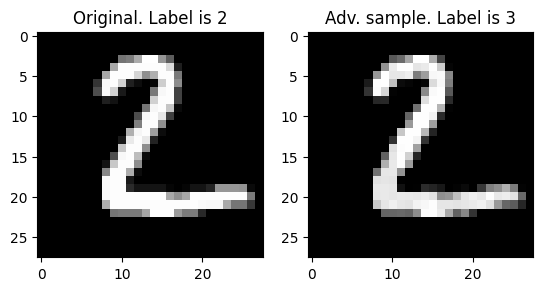

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



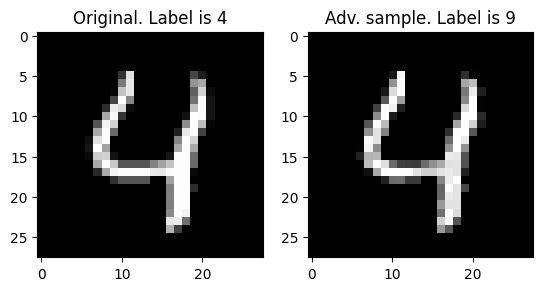

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



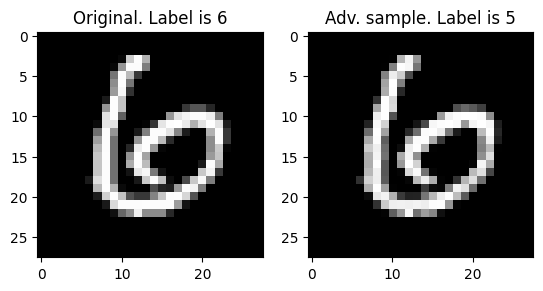

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



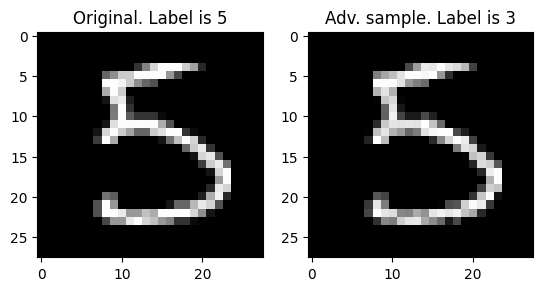

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



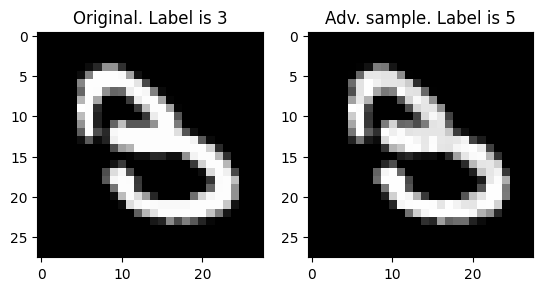

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



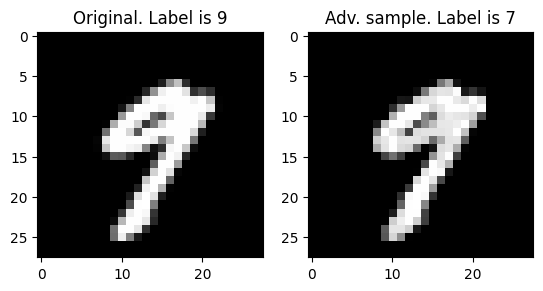

6 out of 20 images are attacked succesfully.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



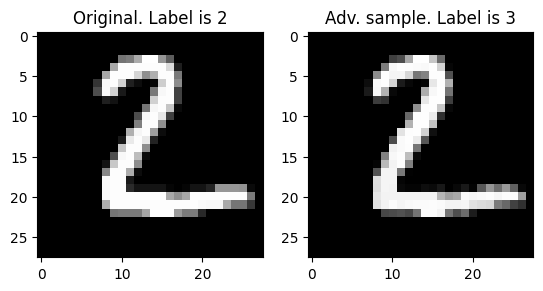

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



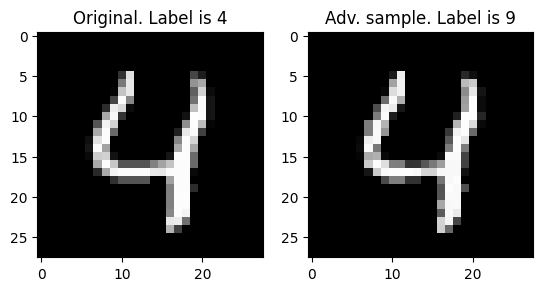

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



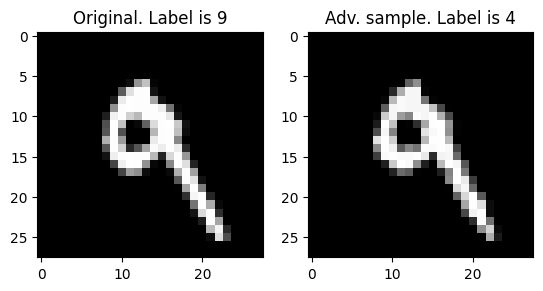

Attack a new image.
Attack successful: Found an adversarial sample.



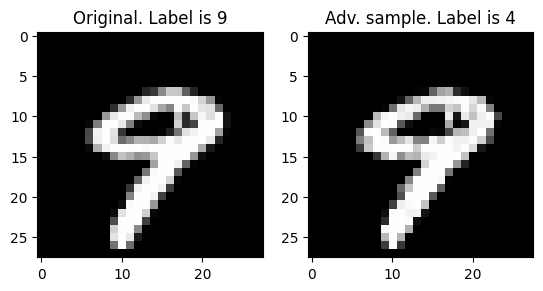

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



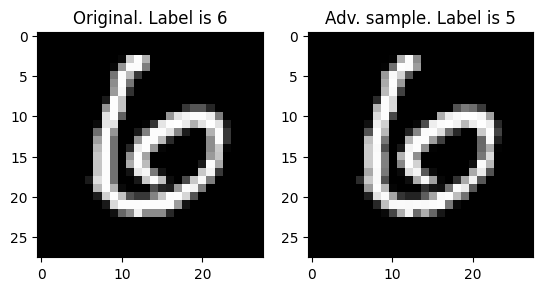

Attack a new image.
Attack successful: Found an adversarial sample.



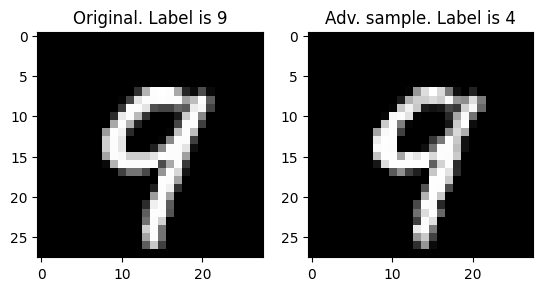

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



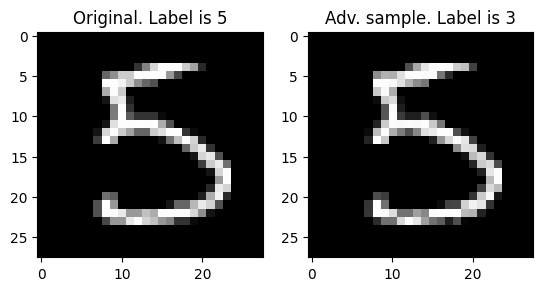

Attack a new image.
Attack successful: Found an adversarial sample.



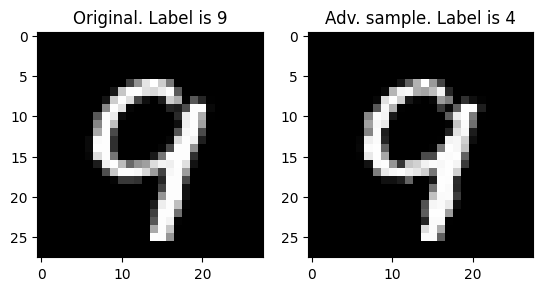

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



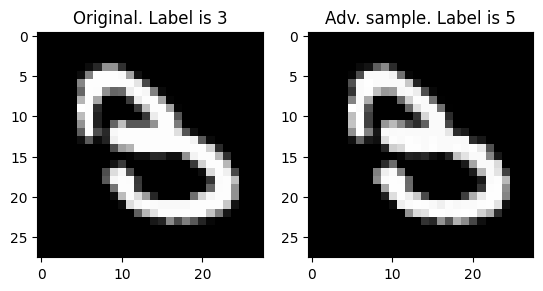

Attack a new image.
Attack unsuccessful.

Attack a new image.
Attack successful: Found an adversarial sample.



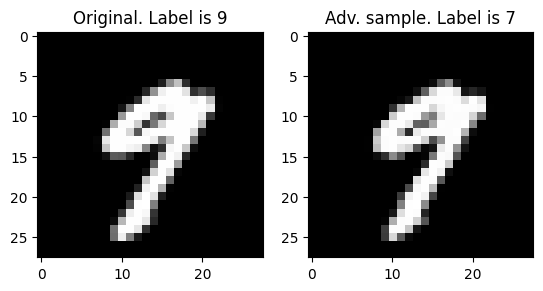

10 out of 20 images are attacked succesfully.



In [10]:
# This is an implementation of C&W, an untargeted attack

import torch

from torch import nn
from torch.utils.data import TensorDataset, DataLoader

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt

import numpy as np
import ast

class MNISTNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 10)
        self.fc4 = nn.Linear(10, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.relu(x)
        x = self.fc4(x)
        output = x # cross entropy in pytorch already includes softmax
        return output


def load_model(model_class, name):
    model = model_class()
    model.load_state_dict(torch.load(name))

    return model


def denormalize(x):
    x = (x * 255).astype('uint8')
    x = x.reshape(28,28)

    return x


def display(x, y, x_adv, y_adv):
    x = denormalize(x)
    x_adv = denormalize(x_adv)

    fig, ax = plt.subplots(1, 2)

    ax[0].set(title='Original. Label is {}'.format(y))
    ax[1].set(title='Adv. sample. Label is {}'.format(y_adv))

    ax[0].imshow(x, cmap='gray')
    ax[1].imshow(x_adv, cmap='gray')

    plt.show()


def get_loss(pred, y):
    mask = torch.eye(len(pred[0]))[y]
    i, _ = torch.max((1 - mask) * pred, dim=1)
    t, _ = torch.max(mask * pred, dim=1)

    return torch.clamp(t - i, min=0.0)


def cw(model, x, y, eps, max_iter, c):
    w = torch.atanh(x * 2 - 1)
    w.requires_grad = True

    optimizer = optim.Adam([w], lr=0.05)

    for _ in range(max_iter):
        x_adv = 0.5 * (torch.tanh(w) + 1)

        l_loss = torch.sum(torch.relu(torch.abs(x_adv - x) - eps))

        pred = model(x_adv)
        f_loss = get_loss(pred, y).sum()

        loss = c * l_loss + f_loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        x_adv = (0.5 * (torch.tanh(w) + 1)).detach()
        delta = torch.clamp(x_adv - x, -eps, eps)
        x_adv = torch.clamp(x + delta, 0, 1)

        pred_adv = model(x_adv)
        y_adv = pred_adv.argmax(1)

        if y_adv != y:
            x = x.detach().numpy().reshape(-1)
            x_adv = x_adv.detach().numpy().reshape(-1)

            y, y_adv = y.item(), y_adv.item()

            print('Attack successful: Found an adversarial sample.\n')

            #print('pred adv = {}'.format(pred_adv.detach().numpy().reshape(-1)))
            #print('lbl adv = {}\n'.format(y_adv))

            display(x, y, x_adv, y_adv)
            return True

    print('Attack unsuccessful.\n')
    return False


model = load_model(MNISTNet, HOME_DIR + 'exercise3/mnist.pt')
num_adv, eps, max_iter, c = 0, 0.05, 100, 1

labels = np.array(ast.literal_eval(open(HOME_DIR + 'exercise3/toattack/labels.txt', 'r').readline()))

num_attack = 20
eps_list = [0.01, 0.02, 0.05, 0.1, 0.2]

for eps in eps_list:
  num_adv = 0
  total_time = 0.0

  for i in range(num_attack):
      print("Attack a new image.")
      file_name = HOME_DIR + 'exercise3/toattack/data' + str(i) + '.txt'
      x = np.array(ast.literal_eval(open(file_name, 'r').readline()))
      x = torch.Tensor(x)
      y = torch.Tensor([labels[i]]).type(torch.LongTensor)

      pred = model(x)
      #print('pred img = {}'.format(pred.detach().numpy().reshape(-1)))
      #print('lbl imp = {}\n'.format(y.item()))

      start = time.time()
      if cw(model, x, y, eps, max_iter, c): num_adv += 1
      end = time.time()
      total_time += (end - start)

  print('{} out of {} images are attacked succesfully.\n'.format(num_adv, num_attack))
  results[eps]["C&W"]["avg_time"] = avg_time
  results[eps]["C&W"]["num_adv"] = num_adv


In [11]:
import pandas as pd

table = {}

for attack in attacks:
    column = []
    for eps in eps_list:
        succ = results[eps][attack]["num_adv"]
        avg_time = results[eps][attack]["avg_time"] / num_attack
        column.append(f"{succ}/{num_attack} ({avg_time:.5f}s)")
    table[attack] = column

df = pd.DataFrame(table, index=eps_list)
df.index.name = "eps"

df


,FGSM,PGD,C&W
eps,,,
0.01,0/20 (0.00010s),0/20 (0.00039s),0/20 (0.01230s)
0.02,0/20 (0.00016s),0/20 (0.00037s),0/20 (0.01230s)
0.05,4/20 (0.00283s),11/20 (0.00700s),0/20 (0.01230s)
0.10,17/20 (0.00832s),19/20 (0.00950s),6/20 (0.01230s)
0.20,20/20 (0.01279s),20/20 (0.01216s),10/20 (0.01230s)
